#### 6. 로지스틱 회귀분석(Logistic Regression)
- 회귀분석 문제와 분류문제 모두 사용가능
- 로지스틱 회귀분석 모형
    - 종속변수 : 이항분포를 따르고 모수$\mu$는 독립변수 $x$에 의존한다고 가정
        - $p(y|x) = Bin(y; \mu(x), N)$
    - $y$의 값이 특정한 구간내의 값( 0∼N )만 가질 수 있기 때문에 종속변수가 이러한 특성을 가진 경우 회귀분석 방법으로 사용 가능
    - 이항 분포의 특별한 경우( N=1 )로  $y$ 가 베르누이 확률분포인 경우
        - $p(y|x) = Bern(y; \mu(x))$
        - y는 0 또는 1인 분류 예측 문제를 풀때 사용

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

#####  시그모이드 함수

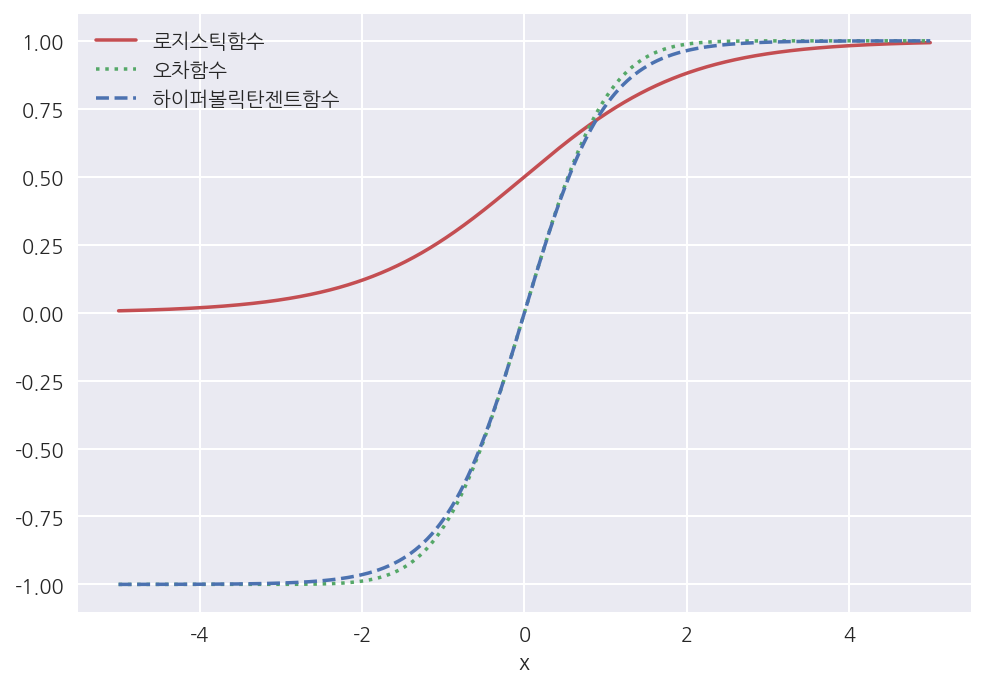

In [3]:
xx = np.linspace(-5, 5, 1000)
plt.plot(xx, 1/(1+np.exp(-xx)), 'r-', label="로지스틱함수")
plt.plot(xx, sp.special.erf(0.5*np.sqrt(np.pi)*xx), 'g:', label="오차함수")
plt.plot(xx, np.tanh(xx), 'b--', label="하이퍼볼릭탄젠트함수")
plt.ylim([-1.1, 1.1])
plt.legend(loc=2)
plt.xlabel("x")
plt.show()

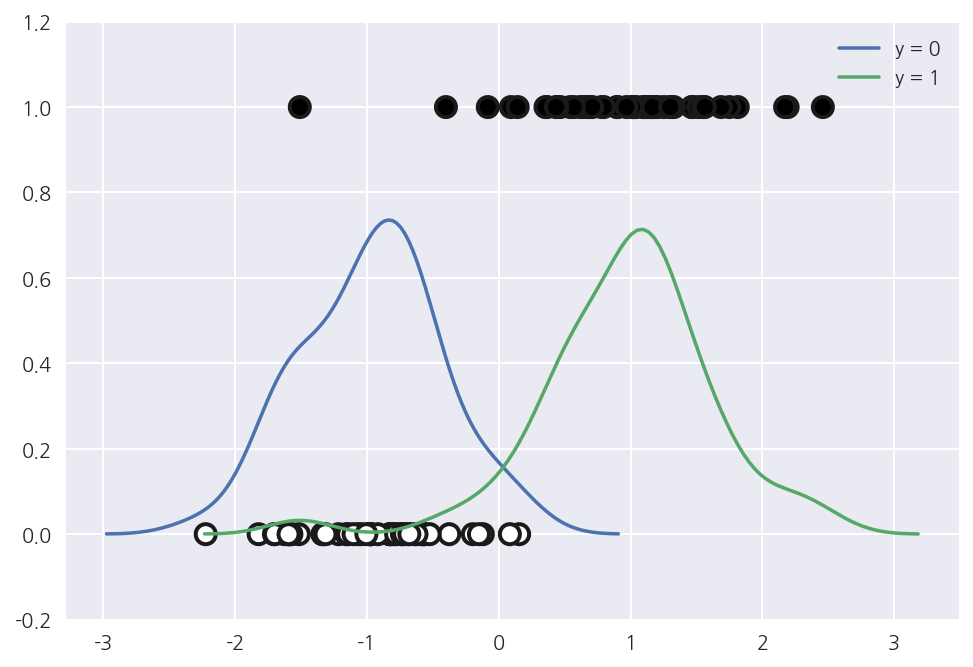

In [4]:
# 1차원 독립변수를 가지는 분류문제
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

##### 로지스틱 분석
- logistics -> LL값을 최대화 하는 값 찾는것
- Logit 클래스 -> 베르누이 분포를 따르는 로지스틱 회귀 모형
    - OLS 클래스와 사용법은 동일
    - 독립변수와 종속변수 데이터를 넣어 모형을 만들고 fit으로 학습
    - disp = 0 : 최적화 과정에서 문자열 메세지가 나타나지 않게 함

In [7]:
X = sm.add_constant(X0)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())
# LL = 가장 크게 하고자 함 -> -16
# 찾고자 하는것 -> w -> coef

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.7679
Time:                        12:51:53   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


판별함수식
- $w_0 = 0.2515, w_1 = 4.2382$
- $\mu(x) = \sigma(4.2382x + 0.2515)$
- z값의 부호를 나누는 기준값 = -0.2515/4.2382
- 유의확률을 감안 했을 때 $w_0 = 0$이라 볼수 있음

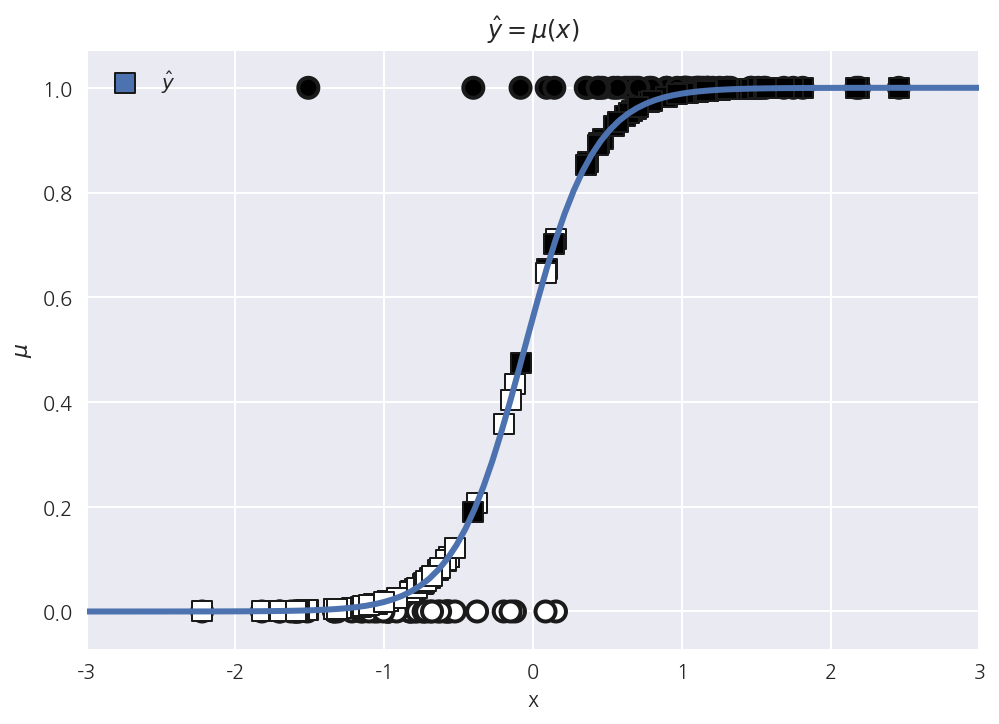

In [8]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

- Logit 모형의 결과 객체에는 fittedvalues 속성
     - 판별함수  $z=w^Tx$  값이 들어가 있다. 이 값을 이용하여 분류문제를 풀 수도 있다.

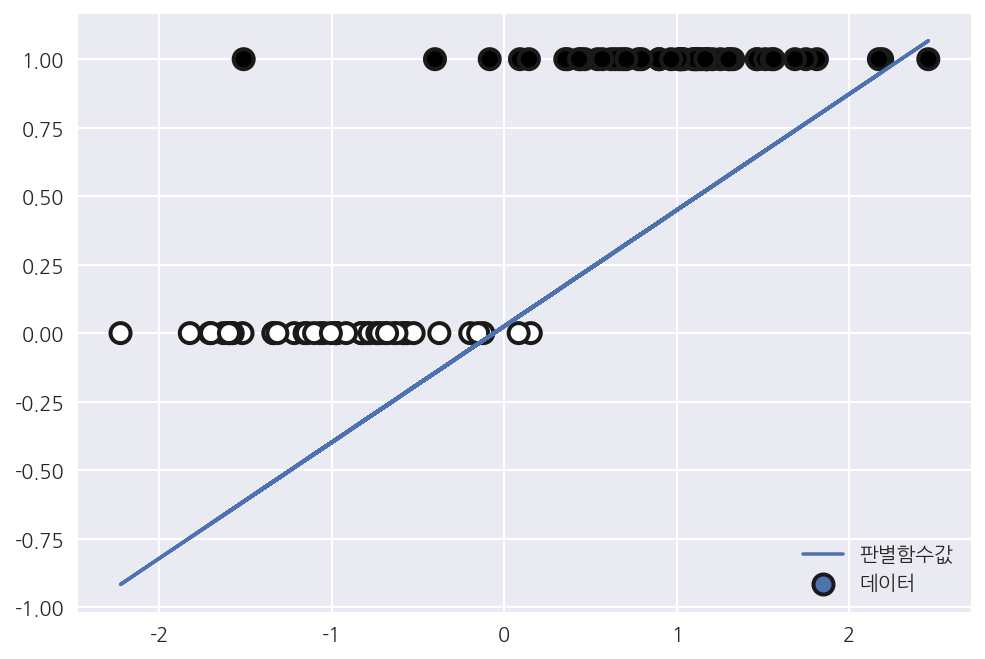

In [9]:
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2, label="데이터")
plt.plot(X0, logit_res.fittedvalues * 0.1, label="판별함수값")
plt.legend()
plt.show()

In [10]:
# 이탈도
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
# log_loss의 normalize=False -> log_loss값
log_loss(y, y_hat, normalize=False)

16.084355200413036

In [11]:
# 귀무 모형
mu_null = np.sum(y) / len(y)
mu_null

0.51

In [12]:
# LL-Null
y_null = np.ones_like(y) * mu_null
log_loss(y, y_null, normalize=False)

69.29471672244784

In [13]:
# Pseudo R-squ
1 - (log_loss(y, y_hat) / log_loss(y, y_null))

0.7678848264170398

##### Scikit-Learn 패키지의 로지스틱 회귀

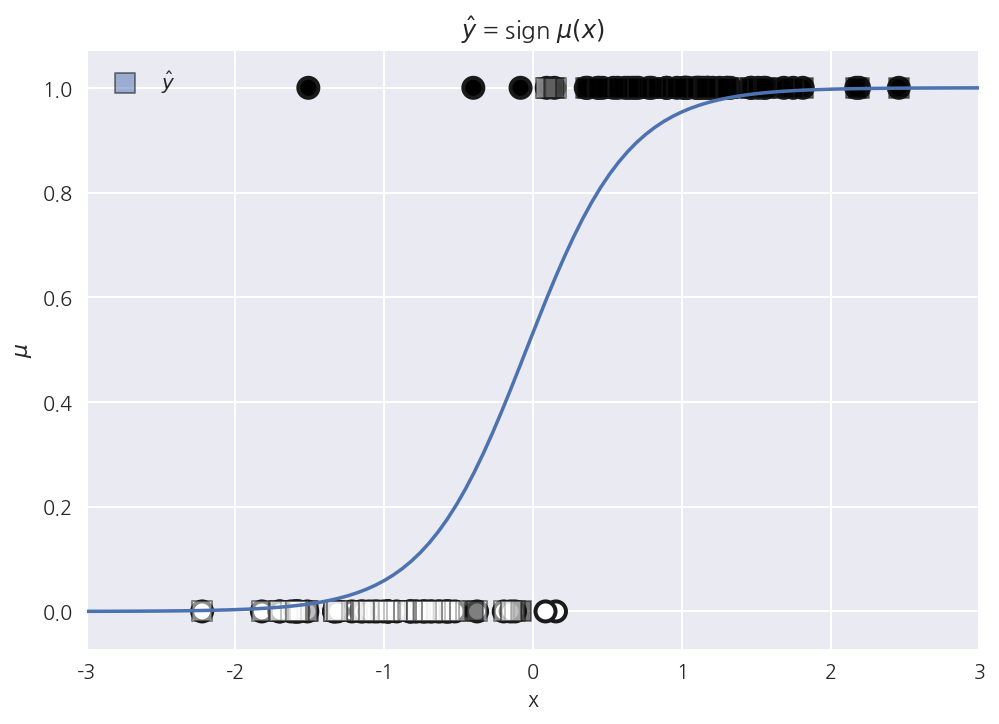

In [14]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
mu = 1.0/(1 + np.exp(-model_sk.coef_[0][0]*xx - model_sk.intercept_[0]))
plt.plot(xx, mu)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, model_sk.predict(X0), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y}$ = sign $\mu(x)$")
plt.legend()
plt.show()

##### 연습문제

In [37]:
from sklearn.datasets import load_iris

iris = load_iris()
# in1d : 0하고 1인 것만 뽑는 것
idx = np.in1d(iris.target, [0, 1])
X0 = iris.data[idx, :1]
X = sm.add_constant(X0)
y = iris.target[idx]

In [38]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.5368
Time:                        14:30:23   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [39]:
# w값
logit_res.params

array([-27.83145099,   5.14033614])

In [21]:
# z 부호를 나누는 기준 값
-logit_res.params[0] / logit_res.params[1]

5.41432510257189

In [22]:
y_pred = logit_res.predict(X) >= 0.5

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02, 0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78,
        0.82, 0.9 , 0.92, 0.98, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52,
        0.58, 0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([ 9.15090198,  8.15090198,  7.12283475,  6.60880114,  6.09476752,
         5.58073391,  5.0667003 ,  4.55266668,  4.03863307,  3.01056584,
         2.49653223,  1.98249861,  1.468465  ,  0.95443139,  0.44039777,
        -0.07363584, -0.58766946, -1.10170307, -1.61573668, -2.1297703 ,
        -2.64380391, -3.15783753, -3.67187114, -4.18590475, -4.69993837,
        -5.21397198, -5.72800559]))

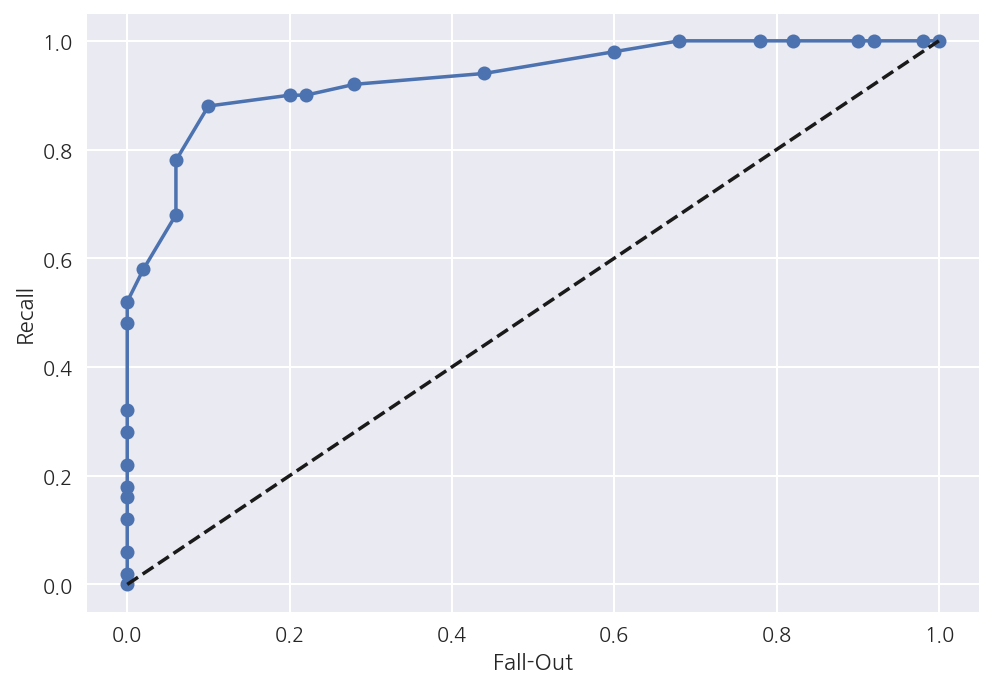

In [25]:
plt.plot(fpr, tpr, 'o-', label = "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Fall-Out")
plt.ylabel("Recall")
plt.show()

In [26]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


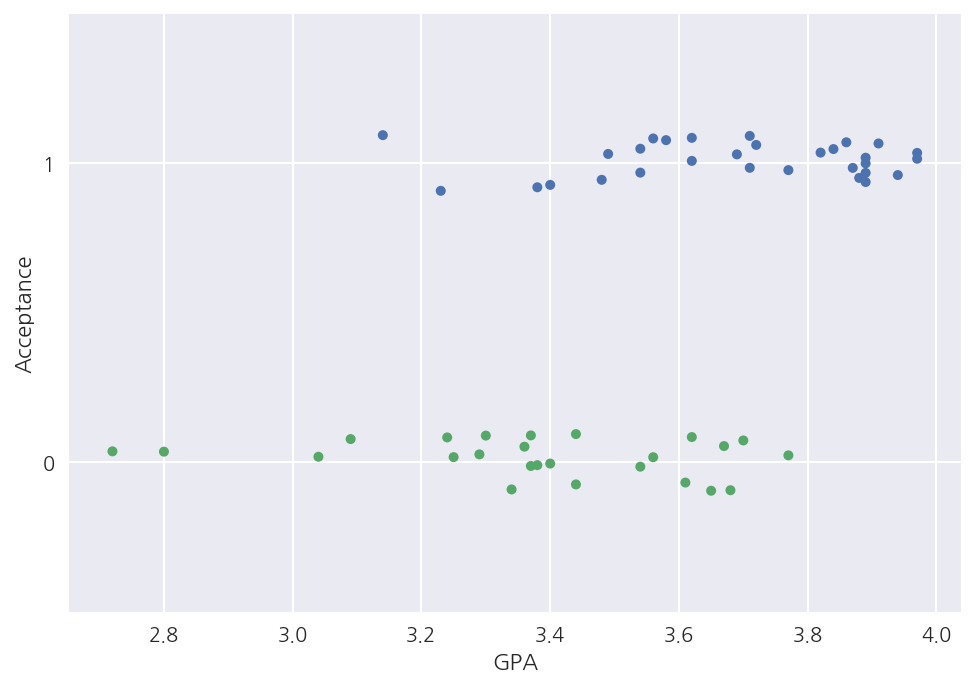

In [27]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [28]:
# MCAT = VR + PS + WS + BS이므로 이 MCAT은 독립 변수에서 제외
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.5913
Time:                        14:22:04   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

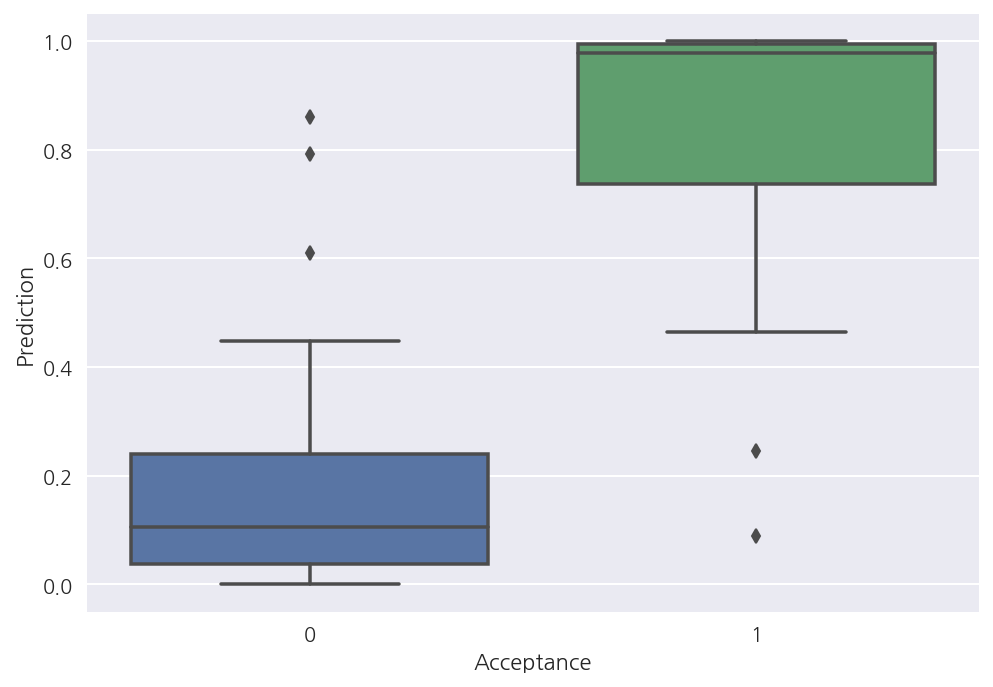

In [29]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

In [30]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())
# 0.4798PS+1.1464BS > 15.5427 합격이라고 예측가능

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3315
Time:                        14:25:25   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

##### 연습문제
- 붓꽃데이터 독립변수가 여러개인 경우

In [40]:
from sklearn.datasets import load_iris

iris = load_iris()
# in1d : 0하고 1인 것만 뽑는 것
idx = np.in1d(iris.target, [1, 2])
X0 = pd.DataFrame(iris.data[idx, :], columns=iris.feature_names[:])
X = sm.add_constant(X0)
y = iris.target[idx] - 1 

In [41]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.9142
Time:                        14:32:07   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.08, 0.08, 1.  ]),
 array([0.  , 0.02, 0.62, 0.66, 0.92, 0.92, 0.98, 0.98, 1.  , 1.  ]),
 array([ 29.13056685,  28.13056685,   8.17633988,   7.85904849,
          2.0990656 ,   1.88016338,   0.70430911,  -1.23771599,
         -1.35610507, -23.50973831]))

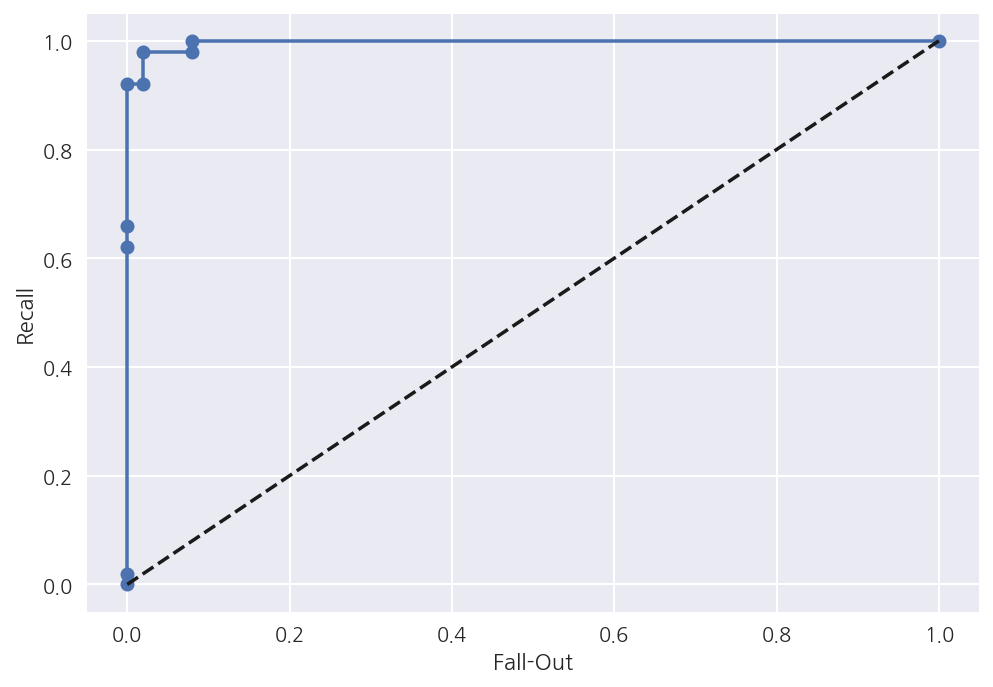

In [43]:
plt.plot(fpr, tpr, 'o-', label = "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Fall-Out")
plt.ylabel("Recall")
plt.show()

##### 로지스틱회귀를 사용한 회귀분석

In [44]:
data_wrole = sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole = data_wrole.data
df_wrole["ratio"] = df_wrole.agree / (df_wrole.agree + df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


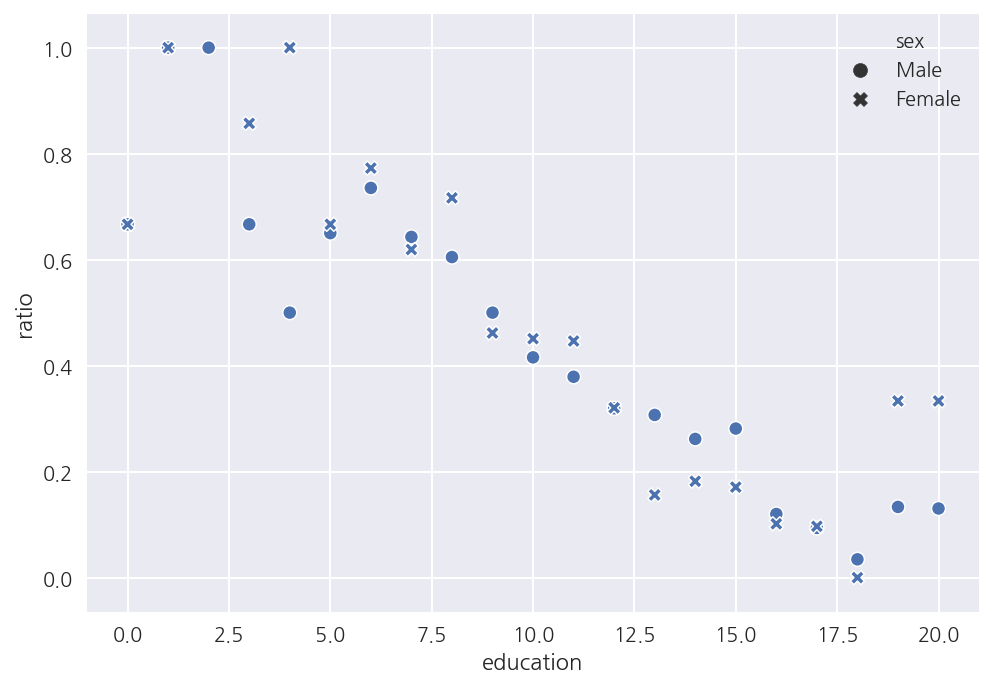

In [45]:
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [46]:
model_wrole = sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole = model_wrole.fit()
print(result_wrole.summary())

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3435
Time:                        14:37:28   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [47]:
model_wrole2 = sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2 = model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 May 2020   Pseudo R-squ.:                  0.3422
Time:                        14:37:36   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

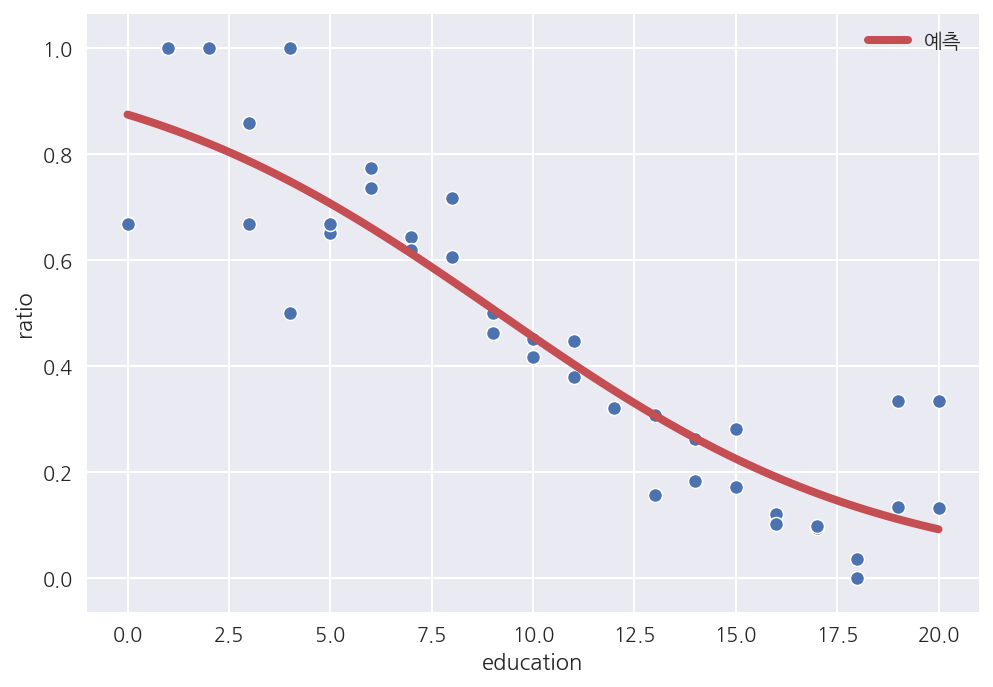

In [48]:
sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx = np.linspace(0, 20, 100)
df_wrole_p = pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="예측")
plt.legend()
plt.show()